In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm #

from modules.models import ArcModel
from modules.utils import load_json_dict


In [16]:
# Load test dataset

batch_size=64
shuffle=True
buffer_size=1000


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_test = x_test/255.

# Norm head

In [17]:
# Load config
config_norm = load_json_dict("configs/test_norm.json")
config_norm

{'input_size': 28,
 'epochs': 1,
 'learning_rate': 0.005,
 'batch_size': 16,
 'num_classes': 10,
 'embd_shape': 2,
 'backbone_type': 'Custom',
 'head_type': 'NormHead',
 'ckpt_name': 'test_norm'}

In [18]:
model_norm = ArcModel(input_size=config_norm['input_size'],
                    backbone_type=config_norm['backbone_type'],
                    training=False)

In [19]:
# Compute embeddings before training

embeddings_before = model_norm(x_test).numpy()

In [20]:
# Load model weights

ckpt_path = tf.train.latest_checkpoint('./checkpoints/' + config_norm['ckpt_name'])
if ckpt_path is not None:
    model_norm.load_weights(ckpt_path)


In [21]:
embeddings_norm = model_norm(x_test).numpy()

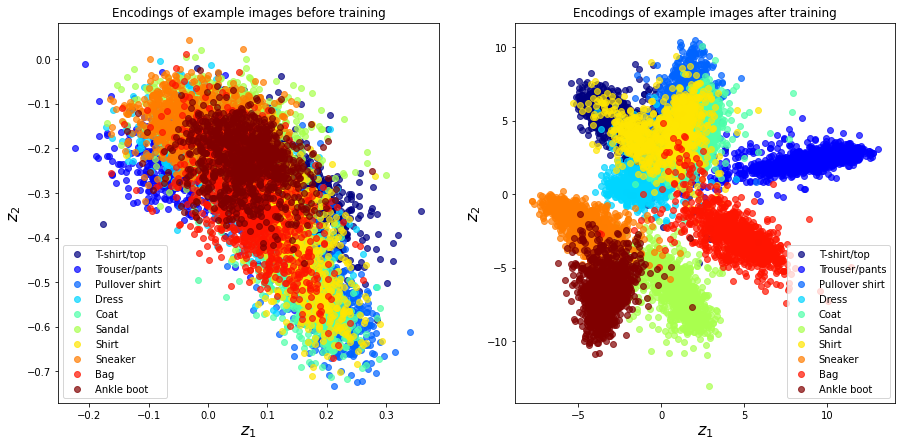

In [22]:
# Plot untrained and trained encodings

class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

plt.figure(figsize=(15, 7))
cmap = cm.get_cmap('jet', 10)

plt.subplot(1, 2, 1)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_before[inx, 0], embeddings_before[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images before training')
plt.legend()

plt.subplot(1, 2, 2)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_norm[inx, 0], embeddings_norm[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images after training')
plt.legend()

plt.show()

# Arc head

In [62]:
# Load config
config_arc = load_json_dict("configs/test_arc.json")
config_arc

{'input_size': 28,
 'epochs': 1,
 'learning_rate': 0.0001,
 'batch_size': 64,
 'num_classes': 10,
 'embd_shape': 2,
 'backbone_type': 'Custom',
 'head_type': 'ArcHead',
 'ckpt_name': 'test_arc'}

In [63]:
model_arc = ArcFaceModel(input_size=config_arc['input_size'],
                    backbone_type=config_arc['backbone_type'],
                    training=False)

In [53]:
# Compute embeddings before training

embeddings_before = model_arc(x_test).numpy()

In [54]:
embeddings_before

array([[ 0.35825455, -0.09018766],
       [ 0.39751503, -0.6030238 ],
       [ 0.47273102, -0.24786082],
       ...,
       [ 0.6462155 ,  0.18111704],
       [ 0.31674004, -0.05420857],
       [ 0.12813222, -0.28361547]], dtype=float32)

In [57]:
# Load model weights

ckpt_path = tf.train.latest_checkpoint('./checkpoints/' + config_arc['ckpt_name'])
if ckpt_path is not None:
    model_arc.load_weights(ckpt_path)


In [58]:
embeddings_arc = model_arc(x_test).numpy()

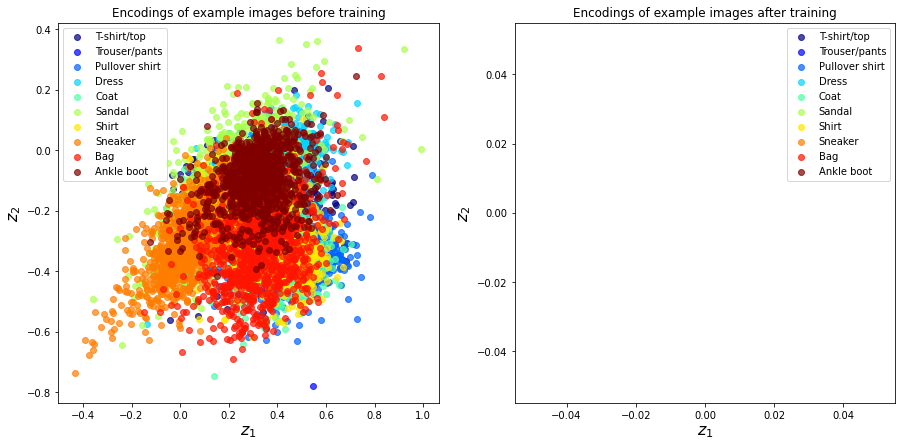

In [59]:
# Plot untrained and trained encodings

class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

plt.figure(figsize=(15, 7))
cmap = cm.get_cmap('jet', 10)

plt.subplot(1, 2, 1)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_before[inx, 0], embeddings_before[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images before training')
plt.legend()

plt.subplot(1, 2, 2)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_arc[inx, 0], embeddings_arc[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images after training')
plt.legend()

plt.show()

# Testing the loss function

In [64]:
from modules.losses import SoftmaxLoss

In [65]:
loss = SoftmaxLoss()

In [67]:
model_arc.output_shape

(None, 2)

In [66]:
batch = tf.random.uniro

loss([1,2],[1,2])

ValueError: `labels.shape.rank` must equal `logits.shape.rank - 1`. Received: labels.shape=(2,) of rank 1 and logits.shape=(2,) of rank 1